# Lecture 4 notebook (Recurrent Neural Networks Example 1: Bit-sequence)
## Introduction to TensorFlow and Deep Learning

## IADS Summer School, 1st August 2022

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk
- This is a Jupyter Notebook to accompany Lecture 4 of the course



## Build a time-sequence test problem

- We will simply generate a random sequence of bits
- The task for the RNN is simply to memorise these bits after a given delay length.
- The longer the delay length, the harder the problem.
- E.g. if the input sequence is 1,0,1,1 and the delay length is 2, then the RNN must output "1,0" for this sequence.


In [1]:
# RNN Demo for tensorflow v2.x
# Bit-sequence memorization problem
# Shows how we can build a RNN using keras to memorise a sequence of bits
# Michael Fairbank July 2019

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

seqLength=50
batchSize=100
delayLength=20 # The longer this is, the more challenging the problem is
testSetSize=100

def calculateInputOutputSequences(seqLength, batchSize, delayLength, useXor=False, seed=None):
    np.random.seed(seed)
    train_input_sequence=np.random.randint(2, size=(batchSize, seqLength,1)) # a random sequence of bits (0 or 1)
    # The objective of this problem is for the RNN to memorize all of the bits shown to the RNN
    train_output_targets=train_input_sequence[:,0:seqLength-delayLength,:]  # removes the last "delayLength" bits from the bit sequence (since these cannot possibly be remembered)
    if useXor:
        # for an extra twist of difficulty, we can xor the bit sequence at time t with the bit sequence at time t-delayLength
        a=train_output_targets
        b=train_input_sequence[:,delayLength:seqLength,:]
        train_output_targets=np.bitwise_xor(a,b)
    return [train_input_sequence.astype(np.float32),train_output_targets.astype(np.float32)]

[train_input_sequence,train_output_targets]=calculateInputOutputSequences(seqLength, batchSize, delayLength, seed=1)
[test_input_sequence,test_output_targets]=calculateInputOutputSequences(seqLength, testSetSize, delayLength, seed=0)
#print("train_input_sequence",train_input_sequence[0:4].reshape((4,-1)))
#print("train_output_targets",train_output_targets[0:4].reshape((4,-1)))

In [2]:
numHiddenNodes=delayLength+3 # this should be enough hidden nodes to solve this problem. Deliberately keeping this small for challenge.
num_output_nodes=1

layer_recurrent=tf.keras.layers.SimpleRNN(numHiddenNodes,return_sequences=True)
#layer_recurrent=tf.keras.layers.LSTM(numHiddenNodes,return_sequences=True)
layer_output_layer=tf.keras.layers.Dense(num_output_nodes, activation=tf.nn.sigmoid)
layer_clip=tf.keras.layers.Lambda(lambda x: x[:,delayLength:,:])

full_recurrent_keras_model=tf.keras.Sequential([layer_recurrent,layer_output_layer,layer_clip])

full_recurrent_keras_model(train_input_sequence[0:1]) # we have to run the network once before the trainable_variables are created


<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[0.5268868 ],
        [0.29275134],
        [0.5215622 ],
        [0.5539851 ],
        [0.3915285 ],
        [0.48200434],
        [0.53390855],
        [0.56289315],
        [0.356924  ],
        [0.44324264],
        [0.5865387 ],
        [0.5968394 ],
        [0.32239172],
        [0.39977613],
        [0.49953175],
        [0.5676674 ],
        [0.38315174],
        [0.58563995],
        [0.5540273 ],
        [0.5635835 ],
        [0.2976803 ],
        [0.3516446 ],
        [0.46809042],
        [0.47133455],
        [0.43922424],
        [0.4287606 ],
        [0.5740374 ],
        [0.4409998 ],
        [0.35006267],
        [0.53028595]]], dtype=float32)>

In [3]:
optimizer=keras.optimizers.Adam()

full_recurrent_keras_model.compile(optimizer=optimizer,  
              loss='mse',
              metrics=[tf.keras.metrics.BinaryAccuracy()])


callback = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', mode='max',patience=10)# try to make it stop when the accuracy stops increasing.  
# see https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback for some more information.

history = full_recurrent_keras_model.fit(train_input_sequence, train_output_targets,
                batch_size=10,
                epochs=500,
                validation_data=(test_input_sequence, test_output_targets), callbacks=[callback])

Epoch 1/500
10/10 [==============================] - 3s 90ms/step - loss: 0.2518 - binary_accuracy: 0.5220 - val_loss: 0.2478 - val_binary_accuracy: 0.5390
Epoch 2/500
10/10 [==============================] - 0s 30ms/step - loss: 0.2381 - binary_accuracy: 0.5920 - val_loss: 0.2333 - val_binary_accuracy: 0.6073
Epoch 3/500
10/10 [==============================] - 0s 27ms/step - loss: 0.2205 - binary_accuracy: 0.6740 - val_loss: 0.2162 - val_binary_accuracy: 0.6750
Epoch 4/500
10/10 [==============================] - 0s 27ms/step - loss: 0.2053 - binary_accuracy: 0.7033 - val_loss: 0.2030 - val_binary_accuracy: 0.7003
Epoch 5/500
10/10 [==============================] - 0s 30ms/step - loss: 0.1897 - binary_accuracy: 0.7490 - val_loss: 0.1885 - val_binary_accuracy: 0.7393
Epoch 6/500
10/10 [==============================] - 0s 30ms/step - loss: 0.1764 - binary_accuracy: 0.7747 - val_loss: 0.1792 - val_binary_accuracy: 0.7530
Epoch 7/500
10/10 [==============================] - 0s 28ms/ste

10/10 [==============================] - 0s 25ms/step - loss: 0.0148 - binary_accuracy: 0.9990 - val_loss: 0.0166 - val_binary_accuracy: 0.9980
Epoch 54/500
10/10 [==============================] - 0s 28ms/step - loss: 0.0145 - binary_accuracy: 0.9990 - val_loss: 0.0165 - val_binary_accuracy: 0.9980
Epoch 55/500
10/10 [==============================] - 0s 30ms/step - loss: 0.0140 - binary_accuracy: 0.9987 - val_loss: 0.0159 - val_binary_accuracy: 0.9990
Epoch 56/500
10/10 [==============================] - 0s 20ms/step - loss: 0.0138 - binary_accuracy: 0.9987 - val_loss: 0.0155 - val_binary_accuracy: 0.9983
Epoch 57/500
10/10 [==============================] - 0s 22ms/step - loss: 0.0130 - binary_accuracy: 0.9990 - val_loss: 0.0148 - val_binary_accuracy: 0.9987
Epoch 58/500
10/10 [==============================] - 0s 20ms/step - loss: 0.0126 - binary_accuracy: 0.9993 - val_loss: 0.0140 - val_binary_accuracy: 0.9983
Epoch 59/500
10/10 [==============================] - 0s 26ms/step - lo

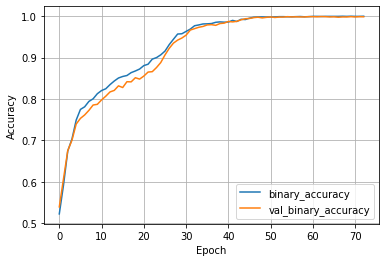

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['binary_accuracy'], label='binary_accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val_binary_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()